# Homework 7: Group 1
#### KNN

David Jung, Ryan Voges, Emily Blake, Spencer Powell, Abraham Alhomadi

In this exercise I want you to apply KNN regression model to the bikeshare data set which is available on the GitHub folder for HW7. The data are 17379 observations of hourly counts from 2011 to 2012 for bike rides (rentals) from the Capital Bikeshare system in Washington DC. It was originally compiled by Fanaee and Gama in ‘Event labeling combining ensemble detectors and background knowledge’ (2013).

You will be qualified to get full mark if you beat the following performance metrics: 

Question 1:        RMSE_test = 120

Question 2:   error_rate_test = 0.05 when threshold =0.5

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
sns.set()
import warnings
warnings.filterwarnings('ignore')

In [2]:
rand_state = 1000

### Question 1: KNN Regression (45 points)

Import the bikeshare.csv as a data frame and name it as df. bikeshare.csv contains:

In [3]:
df = pd.read_csv("bikeshare.csv")

In [4]:
df.head(10)

,season,yr,mnth,hr,holiday,weekday,notbizday,weathersit,temp,hum,windspeed,dteday,cnt
0,1,0,1,0,0,6,1,1,-1.334609,0.947345,-1.553844,2011-01-01,16
1,1,0,1,1,0,6,1,1,-1.438475,0.895513,-1.553844,2011-01-01,40
2,1,0,1,2,0,6,1,1,-1.438475,0.895513,-1.553844,2011-01-01,32
3,1,0,1,3,0,6,1,1,-1.334609,0.636351,-1.553844,2011-01-01,13
4,1,0,1,4,0,6,1,1,-1.334609,0.636351,-1.553844,2011-01-01,1
5,1,0,1,5,0,6,1,2,-1.334609,0.636351,-0.821460,2011-01-01,1
6,1,0,1,6,0,6,1,1,-1.438475,0.895513,-1.553844,2011-01-01,2
7,1,0,1,7,0,6,1,1,-1.542341,1.206507,-1.553844,2011-01-01,3
8,1,0,1,8,0,6,1,1,-1.334609,0.636351,-1.553844,2011-01-01,8
9,1,0,1,9,0,6,1,1,-0.919146,0.688184,-1.553844,2011-01-01,14


In [5]:
for col in df.columns:
    print(col, df[col].nunique())

season 4
yr 2
mnth 12
hr 24
holiday 2
weekday 7
notbizday 2
weathersit 4
temp 50
hum 89
windspeed 30
dteday 731
cnt 869


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      17379 non-null  int64  
 1   yr          17379 non-null  int64  
 2   mnth        17379 non-null  int64  
 3   hr          17379 non-null  int64  
 4   holiday     17379 non-null  int64  
 5   weekday     17379 non-null  int64  
 6   notbizday   17379 non-null  int64  
 7   weathersit  17379 non-null  int64  
 8   temp        17379 non-null  float64
 9   hum         17379 non-null  float64
 10  windspeed   17379 non-null  float64
 11  dteday      17379 non-null  object 
 12  cnt         17379 non-null  int64  
dtypes: float64(3), int64(9), object(1)
memory usage: 1.7+ MB


In [7]:
dummies = ["mnth", "hr", "weathersit"]

In [8]:
df = pd.get_dummies(df, drop_first = True, columns = dummies)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 47 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   season        17379 non-null  int64  
 1   yr            17379 non-null  int64  
 2   holiday       17379 non-null  int64  
 3   weekday       17379 non-null  int64  
 4   notbizday     17379 non-null  int64  
 5   temp          17379 non-null  float64
 6   hum           17379 non-null  float64
 7   windspeed     17379 non-null  float64
 8   dteday        17379 non-null  object 
 9   cnt           17379 non-null  int64  
 10  mnth_2        17379 non-null  uint8  
 11  mnth_3        17379 non-null  uint8  
 12  mnth_4        17379 non-null  uint8  
 13  mnth_5        17379 non-null  uint8  
 14  mnth_6        17379 non-null  uint8  
 15  mnth_7        17379 non-null  uint8  
 16  mnth_8        17379 non-null  uint8  
 17  mnth_9        17379 non-null  uint8  
 18  mnth_10       17379 non-nu

1. Drop the dteday variable and then define your feature space and target variables. Split the data into test (20%) and train set (80%) 

In [10]:
df.drop("dteday", axis=1, inplace = True)

In [11]:
# Defining our target variable and the features and splitting the dataset into train and test:
y = df['cnt']
X = df.drop('cnt', axis=1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=0.2, random_state=rand_state)

In [12]:
X_train.head()

,season,yr,holiday,weekday,notbizday,temp,hum,windspeed,mnth_2,mnth_3,...,hr_17,hr_18,hr_19,hr_20,hr_21,hr_22,hr_23,weathersit_2,weathersit_3,weathersit_4
2136,2,0,0,0,1,-0.399817,-0.970450,0.276298,0,0,...,0,0,0,0,1,0,0,1,0,0
5466,3,0,0,6,1,1.573634,-0.866786,0.031898,0,0,...,0,0,0,0,0,0,0,0,0,0
8770,1,1,0,5,0,-1.438475,0.532687,-0.699669,0,0,...,0,0,0,0,0,0,0,1,0,0
14674,3,1,0,6,1,0.327244,1.310171,0.519881,0,0,...,0,0,0,0,0,0,0,0,1,0
15708,4,1,0,0,1,0.119512,-1.229612,0.519881,0,0,...,1,0,0,0,0,0,0,0,0,0


2. From sklearn.neighbors import the relevant function for KNN regression. Do the followings: (25 points)
    1. Train all the model with the default features. (5 points)
    2.Make predictions on the test set and save them as y_hat (5 points)
    3. Construct a data frame named df_predictions with 2 columns. y_test, and y_hat  from previous part (5 points)
    4. Visualize actual vs predicted counts in the test set using an scatterplot. Are you visually satisfied with the regression model?
    5. Report the RMSE_test for the KNN regression model.

In [13]:
from sklearn.neighbors import KNeighborsRegressor

In [14]:
KNN_regression = KNeighborsRegressor(n_neighbors=5)
KNN_regression.fit(X_train, y_train)

KNeighborsRegressor()

In [15]:
# Predicting the Test set results
y_hat = KNN_regression.predict(X_test)

In [16]:
df_predictions = pd.DataFrame({'y_test':y_test, 'y_hat':y_hat})
df_predictions

,y_test,y_hat
4495,26,34.8
4418,47,90.4
7141,11,25.2
14765,205,161.6
16541,65,32.8
...,...,...
12359,8,24.8
12530,503,269.6
11339,36,31.2
14793,274,340.6


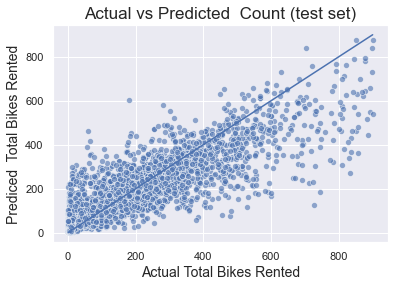

In [17]:
sns.scatterplot(x=y_test, y=y_hat, alpha=0.6)
sns.lineplot(y_test, y_test)

plt.xlabel('Actual Total Bikes Rented', fontsize=14)
plt.ylabel('Prediced  Total Bikes Rented', fontsize=14)
plt.title('Actual vs Predicted  Count (test set)', fontsize=17)
plt.show()

In [18]:
MSE_test = round(np.mean(np.square(y_test - y_hat)),2)
MSE_test

9772.36

In [19]:
RMSE_test = round(np.sqrt(MSE_test),2)
RMSE_test

98.86

3. Cross validation: (15 points)
    1. Estimate the RMSE_test by doing a 5 fold cross validation on the train set and name it as RMSE_CV. (5 points)
    2. Plot the RMSE_CV vs K and find the optimal value for K in the KNN regression model. (10 points)

In [20]:
from sklearn.model_selection import cross_val_score

In [21]:
NMSE = cross_val_score(estimator = KNN_regression, X = X_train, y = y_train, cv = 5, scoring="neg_mean_squared_error" )

In [22]:
MSE_CV = round(np.mean(-NMSE),4)
MSE_CV

10360.0989

In [23]:
RMSE_CV = round(np.sqrt(MSE_CV), 4)
RMSE_CV

101.7846

In [ ]:
RMSE_CV=[]
RMSE_test = []

k=20

for i in range(1,k):
    KNN_i = KNeighborsRegressor(n_neighbors=i)
    KNN_i.fit(X_train, y_train)
    RMSE_i = np.sqrt(np.mean(-1*cross_val_score(estimator = KNN_i, X = X_train, y = y_train, cv = 5, scoring="neg_mean_squared_error" )))
    RMSE_CV.append(RMSE_i)
    
    RMSE_test.append(np.sqrt(np.mean(np.square(y_test - KNN_i.predict(X_test)))))
    
optimal_k = pd.DataFrame({'RMSE_CV': np.round(RMSE_CV,2), 'RMSE_test':np.round(RMSE_test,2)}, index=range(1,k))

In [ ]:
optimal_k.head(10)

In [ ]:
plt.figure(figsize=(10,5))
sns.lineplot(data=optimal_k)
plt.title('Cross Validated RMSE VS K')
plt.xlabel('K')
plt.ylabel('RMSE')
plt.show()

- We would choose a K of 3 because this is when the RMSE_CV is the lowest. 

### Question 2: KNN Classification (105 points)

The managers of Capital Bikeshare have found that the system works smoothly until more than 500 bikes are rented in any one hour. At that point, it becomes necessary to insert extra bikes into the system and move them across stations to balance loads. Do the followings:

1. Define a binary target variable overload. Overload=1 if cnt>500 and 0 otherwise. What are the proportions of overload vs non-overload in your data set? Is the target variable balanced or imbalanced?

In [ ]:
df["overload"] = np.where(df["cnt"] > 500, 1, 0)

In [ ]:
# first we look at target variable proportions:
pd.crosstab(df['overload'],df['overload'], normalize='all')*100

- Our data is very imbalanced, but this is to be expected. It is not very often that we woud expect 500 bikes to be rented in any one hour.

2. Along with the target variable, define your feature space (X) and split the data into test (30%) and train set (70%) 

In [ ]:
y = df['overload']
X = df.drop('overload', axis=1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=rand_state)

In [ ]:
X_train.head()

3. From sklearn.neighbors import the relevant function for KNN classification. Do the followings: (25 points)
    1. Train the KNN classification model using its default parameters. (5 points)
    2. Generate the predicted probabilities and predicted classifications and save them as y_hat_probs, y_hat respectively. (5 points)
    3. Plot the histogram of y_hat_probs? Explain what you see? Is there a probability threshold at which the model always predict negative or positive? (5 points)
    4. Generate predicted classifications for two different thresholds (30% and 70% threshold). Save these new predictions as y_hat_30 and y_hat_70. Which threshold should you use if your goal is to avoid too many false negatives? Explain your answer. (10 points)
    5. Construct a data frame named df_predictions with 5 columns. y_test,  and the 4 y_hats from previous parts 

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# Fitting KNN classifier to the Training set

KNN_classifier = KNeighborsClassifier(n_neighbors=5)
KNN_classifier.fit(X_train, y_train)

Minkowski distance: https://en.wikipedia.org/wiki/Minkowski_distance

In [ ]:
# Predicting the Test set probabilities and classes
y_hat      = KNN_classifier.predict(X_test)
y_hat_probs = KNN_classifier.predict_proba(X_test)[:,1] 
# predicted probabilities are reported for both classes. we saved the prob of overloads or no overloads.

In [ ]:
np.round(KNN_classifier.predict_proba(X_test),3)[:5]

Let's look at the histogram of probabilities of default:

In [ ]:
plt.hist(y_hat_probs)
plt.show()

- We would say the histogram shows a fair distribution, because we knew that our data is relatively imbalanced. Therefore, we expect that the probability that an overload would exist within one hour is highly unlikely, which is what is communicated by the histogram. 

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score

In [ ]:
y_hat_30 = np.where(y_hat_probs>0.3,1,0)
y_hat_70 = np.where(y_hat_probs>0.7,1,0)

In [ ]:
# let's put all the predictions together in a data frame.
df_predictions = pd.DataFrame({'y_test':y_test, 'y_hat_probs':y_hat_probs,
                               'y_hat_30':y_hat_30, 'y_hat_70':y_hat_70})
df_predictions.head(10)

- If our objective is to reduce false negatives, we would choose the lower threshold. Therfore, we would go with 30%. Simply put, we are lowering the bar, so we could avoid our model from incorrectly classifying the observations. 

In [ ]:
y_hat_0 = np.where(y_hat_probs>0,1,0)
y_hat_1 = np.where(y_hat_probs>1,1,0)

In [ ]:
df_predictions2 = pd.DataFrame({'y_test':y_test, 'y_hat_probs':y_hat_probs,
                               'y_hat_0':y_hat_0, 'y_hat_1': y_hat_1})
df_predictions2.head()

In [ ]:
print(confusion_matrix(y_test, y_hat_0))

In [ ]:
print(confusion_matrix(y_test, y_hat_1))

- We would only be able to create a threshold of 1 that would predict all data points as negative. Setting a threshold equal to 0 would still give us similar predictions of setting a threshold between 0 and 1. This is because there are very few probabilities in between 0 and 1. 

4. Borrow my_KNN_report() function from the python notebook of class 13. (25 points) 
    1. Report the Accuracy, precision, recall and f1 score along with the confusion matrix for threshold =0.5. Interpret all these statistics. Do you trust the accuracy of the model? why? (15 points)
    2. Now use threshold = 0.3 in the my_logistic_report() function. what happens to accuracy, precision, recall and f1 score? what happens to false negatives? is this consistent with you answer to question 5.4? (10 points)

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score



def my_KNN_report(X_train, y_train, X_test,y_test, K=5, threshold=0.5):
    knn= KNeighborsClassifier(n_neighbors=K)
    knn.fit(X_train, y_train)
    probs = knn.predict_proba(X_test)[:,1]
    y_hat = np.where(probs>=threshold,1,0)
    
    cm = confusion_matrix(y_test, y_hat)
    accuracy = round(accuracy_score(y_test,y_hat) ,4)
    error_rate = round(1-accuracy,4)
    precision = round(precision_score(y_test,y_hat),2)
    recall = round(recall_score(y_test,y_hat),2)
    f1score = round(f1_score(y_test,y_hat),2)
    cm_labled = pd.DataFrame(cm, index=['Actual : negative ','Actual : positive'], columns=['Predict : negative','Predict :positive '])
    
    print("-----------------------------------------")
    print('Accuracy  = {}'.format(accuracy))
    print('Error_rate  = {}'.format(error_rate))
    print('Precision = {}'.format(precision))
    print('Recall    = {}'.format(recall))
    print('f1_score  = {}'.format(f1score))
    print("-----------------------------------------")
    return cm_labled
 

In [ ]:
my_KNN_report(X_train, y_train, X_test,y_test, K=5, threshold=0.5)

- Since this is a large data set and we know the distribution of the data, we can feel confident in our accuracy score. We also calculated an f1 score of 1.0, which means that our model does a great job of predicting both negative and positive overload probabilities. 

In [ ]:
my_KNN_report(X_train, y_train, X_test,y_test, K=5, threshold=0.3)

- Our false negatives decreased to 0 and our false positives increased to 1. This in turn increased our accuracy to .9998 and our recall to 1.0. I would still say that our model does a great job predicting both negative and positive overload probabilities, but a threshold of 0.3 is better. 

5. Plot the ROC curve and report the AUC score. Is your model doing a better job than random prediction (no skill)? 

In [ ]:
# generate a no skill (ns) prediction and KNN  (lr) predictions.
ns_probs = [0 for i in range(len(y_test))]
lr_probs = KNN_classifier.predict_proba(X_test)[:,1]
# calculating scores for no skill and KNN 
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('KNN: ROC AUC=%.3f' % (lr_auc))

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='KNN')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

- Not to flex, but our model is doing an AMAZING job of predicting overload probabilities compared to the random prediction model

6. Cross validation: (15 points)
    1. Estimate the error_rate_test by doing a 5 fold cross validation on the train set and name it as error_rate_CV. (5 points)
    2. Plot the error_rate_CV vs K and find the optimal value for K in the KNN classification model. (10 points)

In [ ]:
from sklearn.model_selection import cross_val_score
import sklearn.metrics
sorted(sklearn.metrics.SCORERS.keys())

In [ ]:
accuracy = cross_val_score(estimator = KNN_classifier, X = X_train, y = y_train, cv = 5, scoring="accuracy")

In [ ]:
error_rate_CV=round((1-accuracy).mean(),4)
error_rate_CV

In [ ]:
error_rate = []
k=50

for i in range(1,k):
    KNN_i = KNeighborsClassifier(n_neighbors=i)
    KNN_i.fit(X_train, y_train)
    error_rate.append(np.mean(y_test != KNN_i.predict(X_test)) )


In [ ]:
plt.figure(figsize=(10,5))
sns.lineplot(y=error_rate, x=range(1,k))
plt.title('Test Error Rate VS K')
plt.xlabel('K')
plt.ylabel('Error rate')
plt.show()

- Our optimal K is 35. This is when the error rate is minimized and our KNN model is the simplest. 

7. As the manager of Capital Bikeshare, you are dealing with a trade of between unexpected overload cost and cost of idle bikes. If the cost of a single idle bike is smaller than the cost of a single unexpected overload, then which of the following probability thresholds would satisfy your objective? 0.3, 0.5 or 0.7? (15 points)  Hint: idle bike = False overload and unexpected overload = False non-overload

In [ ]:
# idle bike = FP
# unexpected overload = FN
# We want to trade an idle bike for unexpected overload (minimize false negatives)

my_KNN_report(X_train, y_train, X_test,y_test, K=5, threshold=0.3)

In [ ]:
my_KNN_report(X_train, y_train, X_test,y_test, K=5, threshold=0.5)

In [ ]:
my_KNN_report(X_train, y_train, X_test,y_test, K=5, threshold=0.7)

- Given this trade-off between idle bikes and unexpected overloads, we would choose a threshold of 0.3. This minimizes our # of unexpected overloads (false negatives) to 0 and trades any potential overloads for an idle bike (false positive). 